### Estudiante: Melissa Peñaloza

#### Cálculo de Pi

In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter

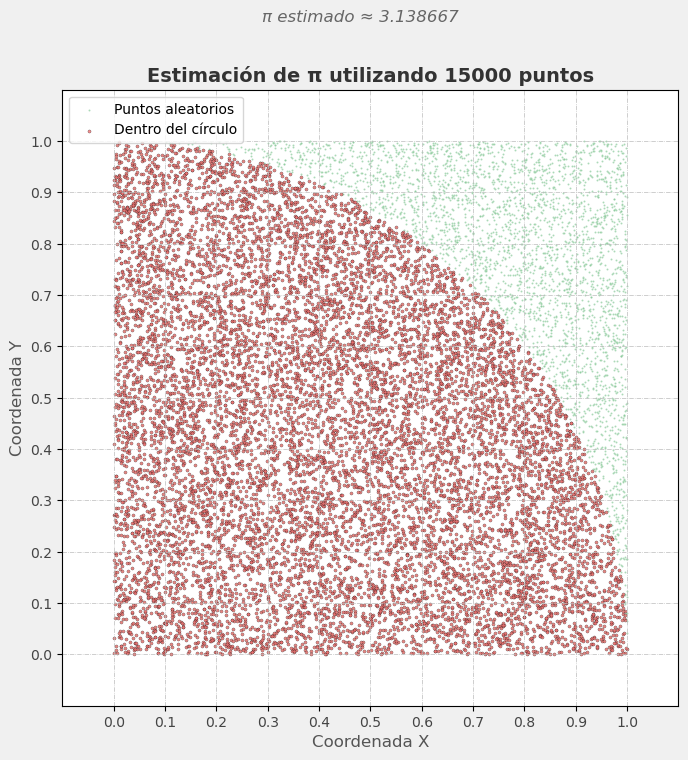

In [13]:
def calcular_pi(numero_puntos):
    puntos_circulo = 0
    coordenadas_x = []
    coordenadas_y = []

    for _ in range(numero_puntos):
        punto_x = random.random() 
        punto_y = random.random()
        coordenadas_x.append(punto_x)
        coordenadas_y.append(punto_y)

        # Verificar 
        if punto_x**2 + punto_y**2 <= 1:
            puntos_circulo += 1

    # Cálculo
    pi_estimado = (puntos_circulo * 4) / numero_puntos
    return pi_estimado, coordenadas_x, coordenadas_y

numero_puntos = 15000
pi_estimado, coordenadas_x, coordenadas_y = calcular_pi(numero_puntos)

# Generación del gráfico
plt.figure(figsize=(8, 8), facecolor='#f0f0f0')  
plt.scatter(coordenadas_x, coordenadas_y, s=2, color='#88c999', alpha=0.7, edgecolor='w', linewidth=0.1, label='Puntos aleatorios')

# lista 
puntos_x_circulo = [coordenadas_x[i] for i in range(numero_puntos) if coordenadas_x[i]**2 + coordenadas_y[i]**2 <= 1]
puntos_y_circulo = [coordenadas_y[i] for i in range(numero_puntos) if coordenadas_x[i]**2 + coordenadas_y[i]**2 <= 1]
plt.scatter(puntos_x_circulo, puntos_y_circulo, s=5, color='#f27474', alpha=0.8, edgecolor='k', linewidth=0.2, label='Dentro del círculo')

plt.title(f'Estimación de π utilizando {numero_puntos} puntos', fontsize=14, fontweight='bold', color='#333333')
plt.suptitle(f'π estimado ≈ {pi_estimado:.6f}', fontsize=12, color='#666666', style='italic')
plt.xlabel('Coordenada X', fontsize=12, color='#555555')
plt.ylabel('Coordenada Y', fontsize=12, color='#555555')


plt.xlim(-0.1, 1.1) 
plt.ylim(-0.1, 1.1)
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks([i/10 for i in range(11)], color='#444444')
plt.yticks([i/10 for i in range(11)], color='#444444')
plt.grid(True, linestyle='-.', linewidth=0.5, color='#bbbbbb') 

plt.legend(loc='upper left', fontsize=10, frameon=True, facecolor='#ffffff', edgecolor='#cccccc')
plt.show()

#### Implementación de métodos

Resultados del Generador LCG:
Media: 0.3950
Varianza: 0.0781
Uniformidad (Chi-cuadrado): 1500.0000

Resultados del Generador Inverso:
Media: 0.4798
Varianza: 0.0834
Uniformidad (Chi-cuadrado): 0.2800

Resultados del Generador Fibonacci:
Media: 0.0569
Varianza: 1.5832
Uniformidad (Chi-cuadrado): 8924.1800



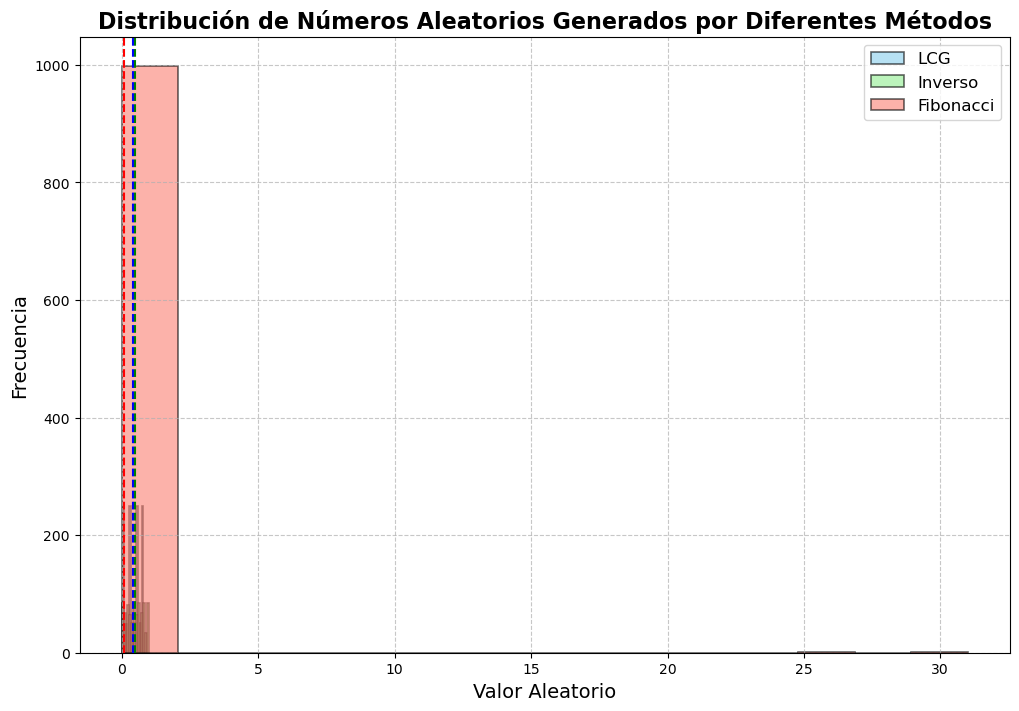

In [21]:
# Método de Generador Congruencial Lineal (LCG)
def generador_lcg(semilla, multiplicador, incremento, modulo, cantidad):
    """Generador de números aleatorios utilizando el método LCG."""
    resultados = []
    valor = semilla
    for _ in range(cantidad):
        valor = (multiplicador * valor + incremento) % modulo
        resultados.append(valor / modulo)
    return resultados

# Método de Generador Congruencial Inverso (Inverso)
def generador_inverso_congruencial(semilla, multiplicador, incremento, modulo, cantidad):
    """Generador de números aleatorios utilizando el método Congruencial Inverso."""
    def calcular_inverso_modular(x, modulo):
        # Calcula el inverso modular
        for i in range(1, modulo):
            if (x * i) % modulo == 1:
                return i
        return None

    resultados = []
    valor = semilla
    for _ in range(cantidad):
        inv_valor = calcular_inverso_modular(valor, modulo)
        if inv_valor is None:
            inv_valor = valor  # Si no existe un inverso, usar el valor original
        valor = (multiplicador * inv_valor + incremento) % modulo
        resultados.append(valor / modulo)
    return resultados

# Generador de números aleatorios usando Fibonacci (Suma)
def generador_fibonacci(semilla1, semilla2, cantidad, modulo):
    """Generador de números aleatorios utilizando el método Fibonacci por Suma."""
    resultados = [semilla1, semilla2]
    for i in range(2, cantidad):
        nuevo_numero = (resultados[i-1] + resultados[i-2]) % modulo
        resultados.append(nuevo_numero / modulo)
    return resultados

# Generador de números aleatorios usando Fibonacci (Multiplicación)
def generador_fibonacci_multiplicacion(semilla1, semilla2, cantidad, modulo):
    """Generador de números aleatorios utilizando el método Fibonacci por Multiplicación."""
    resultados = [semilla1, semilla2]
    for i in range(2, cantidad):
        nuevo_numero = (resultados[i-1] * resultados[i-2]) % modulo
        resultados.append(nuevo_numero / modulo)
    return resultados

# Generador de números aleatorios usando Fibonacci (XOR)
def generador_fibonacci_xor(semilla1, semilla2, cantidad, modulo):
    """Generador de números aleatorios utilizando el método Fibonacci por XOR."""
    resultados = [semilla1, semilla2]
    for i in range(2, cantidad):
        nuevo_numero = (resultados[i-1] ^ resultados[i-2]) % modulo
        resultados.append(nuevo_numero / modulo)
    return resultados

# Prueba de Uniformidad con Chi-Cuadrado
def prueba_chi_cuadrado(numeros_aleatorios):
    """Calcula la prueba de Chi-Cuadrado para verificar uniformidad de números aleatorios."""
    n = len(numeros_aleatorios)
    frecuencias = Counter([int(x * 10) for x in numeros_aleatorios])
    frecuencia_esperada = n / 10
    chi_cuadrado = sum(((frecuencias[i] - frecuencia_esperada) ** 2) / frecuencia_esperada for i in range(10))
    return chi_cuadrado

# Prueba de Media
def prueba_media(numeros_aleatorios):
    """Calcula la media de los números generados."""
    return np.mean(numeros_aleatorios)

# Prueba de Varianza
def prueba_varianza(numeros_aleatorios):
    """Calcula la varianza de los números generados."""
    return np.var(numeros_aleatorios)

# Parámetros de generación
cantidad_numeros = 1000
semilla = 27
multiplicador = 17
incremento = 43
modulo = 100

# Generación de números aleatorios con diferentes métodos
numeros_lcg = generador_lcg(semilla, multiplicador, incremento, modulo, cantidad_numeros)
numeros_inverso = generador_inverso_congruencial(semilla, multiplicador, incremento, modulo, cantidad_numeros)
numeros_fibonacci = generador_fibonacci(25, 31, cantidad_numeros, modulo)

# Pruebas de aleatoriedad
print("Resultados del Generador LCG:")
print(f"Media: {prueba_media(numeros_lcg):.4f}")
print(f"Varianza: {prueba_varianza(numeros_lcg):.4f}")
print(f"Uniformidad (Chi-cuadrado): {prueba_chi_cuadrado(numeros_lcg):.4f}\n")

print("Resultados del Generador Inverso:")
print(f"Media: {prueba_media(numeros_inverso):.4f}")
print(f"Varianza: {prueba_varianza(numeros_inverso):.4f}")
print(f"Uniformidad (Chi-cuadrado): {prueba_chi_cuadrado(numeros_inverso):.4f}\n")

print("Resultados del Generador Fibonacci:")
print(f"Media: {prueba_media(numeros_fibonacci):.4f}")
print(f"Varianza: {prueba_varianza(numeros_fibonacci):.4f}")
print(f"Uniformidad (Chi-cuadrado): {prueba_chi_cuadrado(numeros_fibonacci):.4f}\n")

# Visualización gráfica de los resultados
plt.figure(figsize=(12, 8)) 

plt.hist(numeros_lcg, bins=15, alpha=0.6, label="LCG", color="skyblue", edgecolor='black', linewidth=1.2)

plt.hist(numeros_inverso, bins=15, alpha=0.6, label="Inverso", color="lightgreen", edgecolor='black', linewidth=1.2)

plt.hist(numeros_fibonacci, bins=15, alpha=0.6, label="Fibonacci", color="salmon", edgecolor='black', linewidth=1.2)

# Configuración de la gráfica
plt.legend(loc="upper right", fontsize=12)  # Ajuste del tamaño de fuente de la leyenda
plt.title("Distribución de Números Aleatorios Generados por Diferentes Métodos", fontsize=16, fontweight='bold')
plt.xlabel("Valor Aleatorio", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.axvline(prueba_media(numeros_lcg), color='blue', linestyle='dashed', linewidth=1.5, label='Media LCG')
plt.axvline(prueba_media(numeros_inverso), color='green', linestyle='dashed', linewidth=1.5, label='Media Inverso')
plt.axvline(prueba_media(numeros_fibonacci), color='red', linestyle='dashed', linewidth=1.5, label='Media Fibonacci')

plt.show()